# Application of Machine Learning in Employee Burnout Prediction in Organizations

## Table Of Contents
1. Data Cleaning
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation


## Data Cleaning

In [ ]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ML for Burnout Prediction.csv')

In [ ]:
df.head()

,Timestamp,Age Range,What working model is employed by your place of work?,"As at the time of filling this form, how many outstanding work tasks do you have?",Are you satisfied with the number of annual leave days that your company gives you?,Do you feel appreciated at work?,Do you love your job?,How would you rate the work culture of your place of work?,How would you rate the level of communication between you and your manager/employer/client?,How would you rate the level of collaboration within your team?,What is your current work-induced stress level?,How often do you have to cover for your colleagues?,Do you often take on more tasks than you can handle at work?,Are you currently burnt out?,Any comments
0,2024/06/18 12:11:41 pm CET,16-25,Remote,5,Maybe,Yes,Maybe,6,7,6,6,Often,Yes,Yes,NaN
1,2024/06/18 12:33:57 pm CET,16-25,Remote,4,Maybe,Yes,Yes,10,8,6,10,Never,No,Yes,NaN
2,2024/06/18 4:44:24 pm CET,16-25,Remote,5,Maybe,Yes,Yes,7,7,9,10,Very often,Yes,Yes,NaN
3,2024/06/18 7:56:16 pm CET,16-25,Hybrid,4,Yes,Yes,Yes,9,8,5,5,Very often,Yes,Yes,NaN
4,2024/06/19 1:58:23 pm CET,16-25,On-site,2,No,No,Yes,4,8,8,9,Seldom,Yes,Yes,I'm tired!(crying)


In [ ]:
df.shape

(106, 15)

In [ ]:
# Check for missing values

df.isnull().sum()

,0
Timestamp,0
Age Range,0
What working model is employed by your place of work?,0
"As at the time of filling this form, how many outstanding work tasks do you have?",9
Are you satisfied with the number of annual leave days that your company gives you?,0
Do you feel appreciated at work?,0
Do you love your job?,0
How would you rate the work culture of your place of work?,0
How would you rate the level of communication between you and your manager/employer/client?,0
How would you rate the level of collaboration within your team?,0


In [ ]:
# Drop any comments

df.drop('Any comments', axis=1, inplace=True)

In [ ]:
# Replace missing values in column 4 with 0

col = 'As at the time of filling this form, how many outstanding work tasks do you have?'
df[col] = df[col].fillna(0)

In [ ]:
# Check again for missing values

df.isnull().sum()

,0
Timestamp,0
Age Range,0
What working model is employed by your place of work?,0
"As at the time of filling this form, how many outstanding work tasks do you have?",0
Are you satisfied with the number of annual leave days that your company gives you?,0
Do you feel appreciated at work?,0
Do you love your job?,0
How would you rate the work culture of your place of work?,0
How would you rate the level of communication between you and your manager/employer/client?,0
How would you rate the level of collaboration within your team?,0


In [ ]:
# Check for consistent data types in columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Timestamp                                                                                    106 non-null    object
 1   Age Range                                                                                    106 non-null    object
 2   What working model is employed by your place of work?                                        106 non-null    object
 3   As at the time of filling this form, how many outstanding work tasks do you have?            106 non-null    object
 4   Are you satisfied with the number of annual leave days that your company gives you?          106 non-null    object
 5   Do you feel appreciated at work?           

In [ ]:
df.head(10)

,Timestamp,Age Range,What working model is employed by your place of work?,"As at the time of filling this form, how many outstanding work tasks do you have?",Are you satisfied with the number of annual leave days that your company gives you?,Do you feel appreciated at work?,Do you love your job?,How would you rate the work culture of your place of work?,How would you rate the level of communication between you and your manager/employer/client?,How would you rate the level of collaboration within your team?,What is your current work-induced stress level?,How often do you have to cover for your colleagues?,Do you often take on more tasks than you can handle at work?,Are you currently burnt out?
0,2024/06/18 12:11:41 pm CET,16-25,Remote,5,Maybe,Yes,Maybe,6,7,6,6,Often,Yes,Yes
1,2024/06/18 12:33:57 pm CET,16-25,Remote,4,Maybe,Yes,Yes,10,8,6,10,Never,No,Yes
2,2024/06/18 4:44:24 pm CET,16-25,Remote,5,Maybe,Yes,Yes,7,7,9,10,Very often,Yes,Yes
3,2024/06/18 7:56:16 pm CET,16-25,Hybrid,4,Yes,Yes,Yes,9,8,5,5,Very often,Yes,Yes
4,2024/06/19 1:58:23 pm CET,16-25,On-site,2,No,No,Yes,4,8,8,9,Seldom,Yes,Yes
5,2024/06/19 1:59:09 pm CET,26-40,Remote,3,No,Yes,Yes,8,8,8,6,Very often,Yes,Yes
6,2024/06/19 2:00:38 pm CET,16-25,On-site,2,No,Yes,Yes,7,5,4,8,Seldom,No,Yes
7,2024/06/19 2:02:56 pm CET,16-25,Hybrid,0,No,Yes,Maybe,7,6,7,4,Seldom,No,No
8,2024/06/19 2:05:00 pm CET,16-25,Remote,3,Yes,Yes,Yes,7,4,8,6,Seldom,No,Yes
9,2024/06/19 2:12:33 pm CET,26-40,Hybrid,3,Yes,Yes,Yes,6,10,9,7,Often,No,No


In [ ]:
# Check frequency table of column 4

col = 'As at the time of filling this form, how many outstanding work tasks do you have?'

# Remove leading spaces and covert to lowercase
df[col] = df[col].str.strip()
df[col] = df[col].str.lower()

df[col].value_counts()

,count
"As at the time of filling this form, how many outstanding work tasks do you have?",
2,18
3,17
5,12
1,10
4,7
0,5
10,5
one,3
none,2


In [ ]:
# Clean column 4

zero = ['none, my work is usually consistent until it\'s completed', 'i don\'t even know', 'nil', 'zero', 'none']
one = ['one', 'i am a pensioner. i do not have work tasks, but i currently have one self imposed proposals which i will love to see to a logical conclusion.']
two = ['two']
three = ['about three']
four = ['quite a number (3-5)', '3-5', 'i have bau (business as usual) tasks which are ongoing and some on off pieces of work which i need to complete to various deadlines. at the moment i have 4 one off tasks which are being completed according to priority.']
cant_count = ['many. they are many and i can\'t count them.', 'plenty', 'i can even count', 'countless']

text = [zero, one, two, three, four, cant_count]
num = [0, 1, 2, 3, 4, 25]

for i in range(len(text)):
  for j in text[i]:
    df[col] = df[col].replace(j, num[i])

In [ ]:
df[col].value_counts()

,count
"As at the time of filling this form, how many outstanding work tasks do you have?",
2,18
3,17
5,12
1,10
4,7
0,6
10,5
0,5
25,4


In [ ]:
# Convert to integer data type

df[col].fillna(0, inplace=True)
df[col] = df[col].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 14 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Timestamp                                                                                    106 non-null    object
 1   Age Range                                                                                    106 non-null    object
 2   What working model is employed by your place of work?                                        106 non-null    object
 3   As at the time of filling this form, how many outstanding work tasks do you have?            106 non-null    int64 
 4   Are you satisfied with the number of annual leave days that your company gives you?          106 non-null    object
 5   Do you feel appreciated at work?           

In [ ]:
df.head()

,Timestamp,Age Range,What working model is employed by your place of work?,"As at the time of filling this form, how many outstanding work tasks do you have?",Are you satisfied with the number of annual leave days that your company gives you?,Do you feel appreciated at work?,Do you love your job?,How would you rate the work culture of your place of work?,How would you rate the level of communication between you and your manager/employer/client?,How would you rate the level of collaboration within your team?,What is your current work-induced stress level?,How often do you have to cover for your colleagues?,Do you often take on more tasks than you can handle at work?,Are you currently burnt out?
0,2024/06/18 12:11:41 pm CET,16-25,Remote,5,Maybe,Yes,Maybe,6,7,6,6,Often,Yes,Yes
1,2024/06/18 12:33:57 pm CET,16-25,Remote,4,Maybe,Yes,Yes,10,8,6,10,Never,No,Yes
2,2024/06/18 4:44:24 pm CET,16-25,Remote,5,Maybe,Yes,Yes,7,7,9,10,Very often,Yes,Yes
3,2024/06/18 7:56:16 pm CET,16-25,Hybrid,4,Yes,Yes,Yes,9,8,5,5,Very often,Yes,Yes
4,2024/06/19 1:58:23 pm CET,16-25,On-site,2,No,No,Yes,4,8,8,9,Seldom,Yes,Yes


In [ ]:
# Drop the timestamp column

df.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# Rename columns

columns = df.columns.tolist()
new_names = ['age', 'working_model', 'outstanding_tasks', 'leave_day_satisfaction', 'is_appreciated', 'love_job', 'work_culture', 'work_communication', 'work_collaboration', 'work_stress', 'cover_up', 'more_tasks_than_can_handle', 'burnout', 'comments']
df.rename(columns=dict(zip(columns, new_names)), inplace=True)

## Data Understanding

<Axes: >

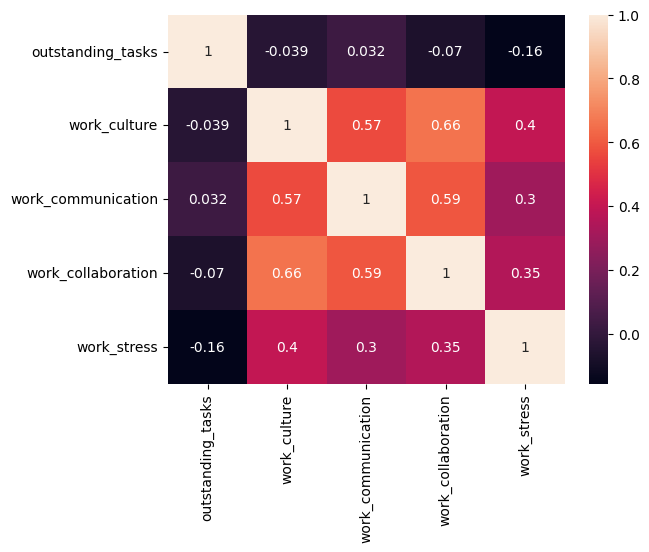

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

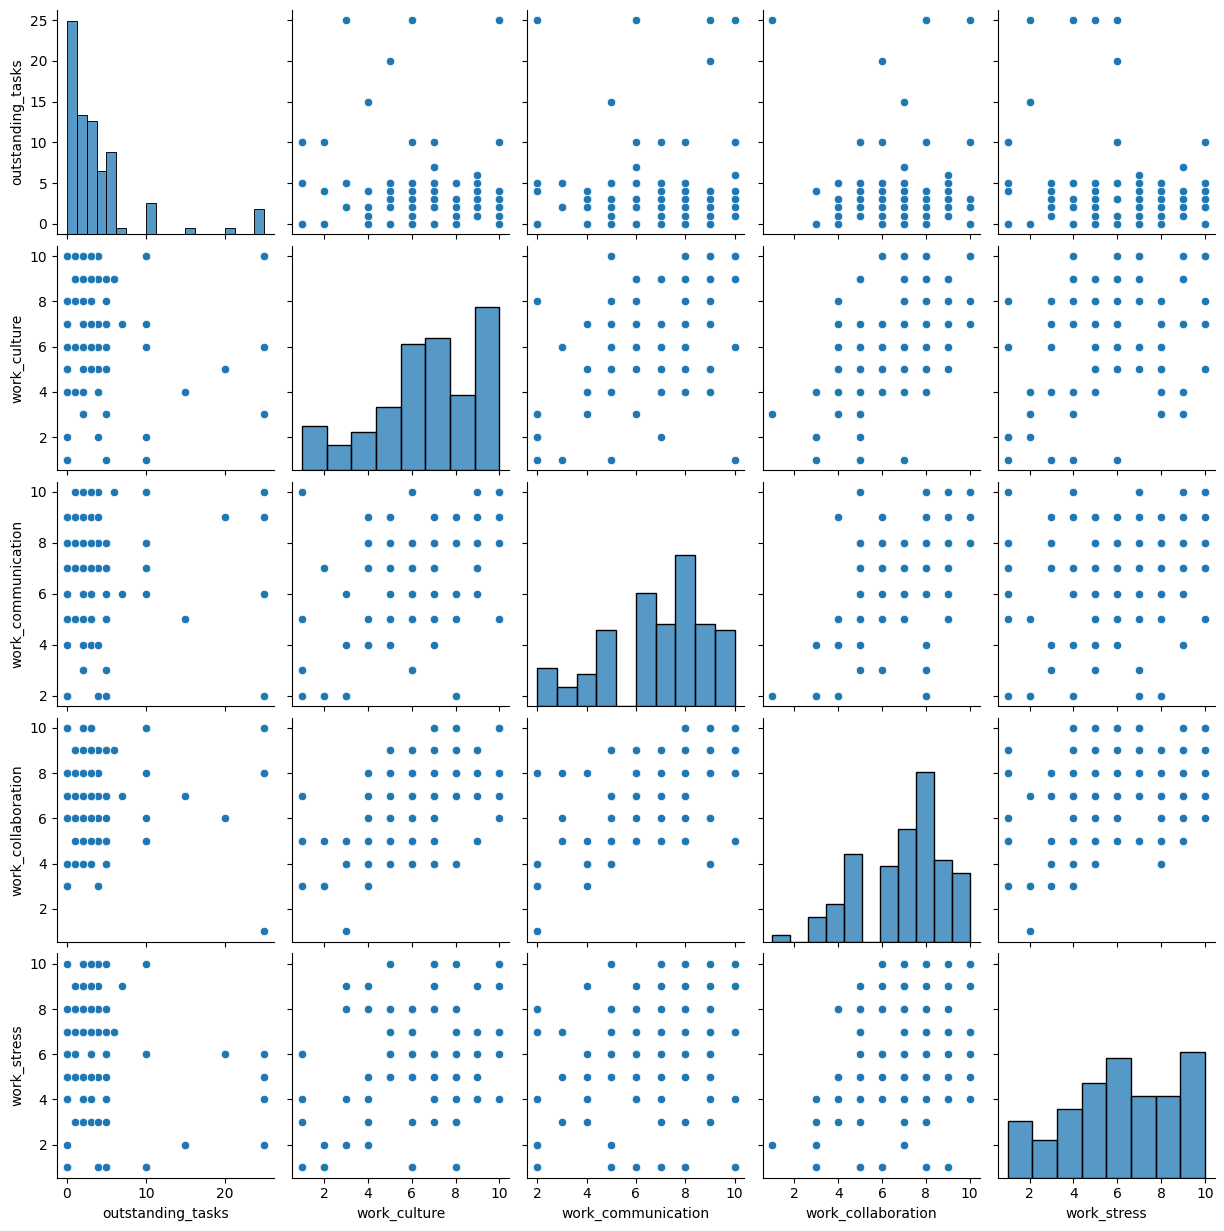

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of outstanding tasks across work models')

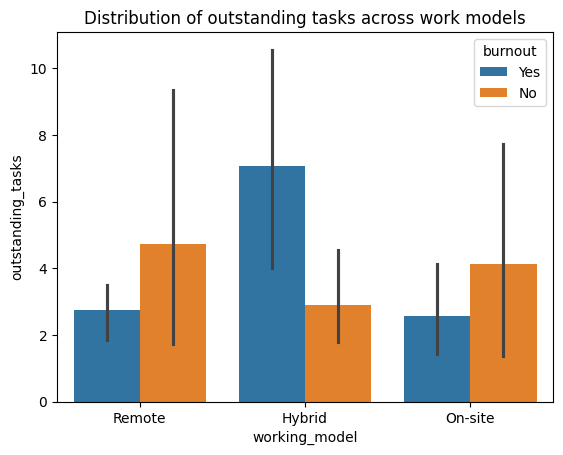

In [ ]:
sns.barplot(x='working_model', y='outstanding_tasks', hue='burnout', data=df)
plt.title('Distribution of outstanding tasks across work models')

Text(0.5, 1.0, 'Negative burnout stress distribution')

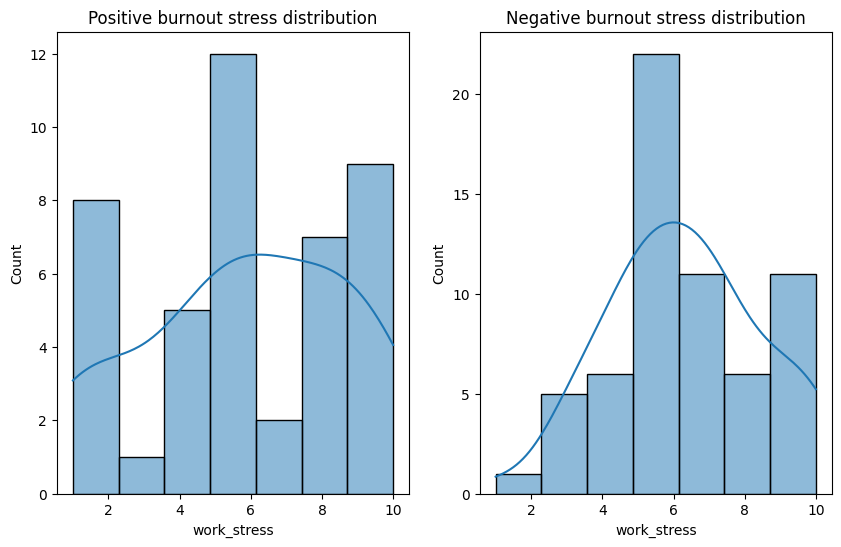

In [ ]:
pos_df = df[df['burnout']=='Yes']
neg_df = df[df['burnout']=='No']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(pos_df["work_stress"], kde=True)
plt.title("Positive burnout stress distribution")

plt.subplot(1, 2, 2)
sns.histplot(neg_df["work_stress"], kde=True)
plt.title("Negative burnout stress distribution")

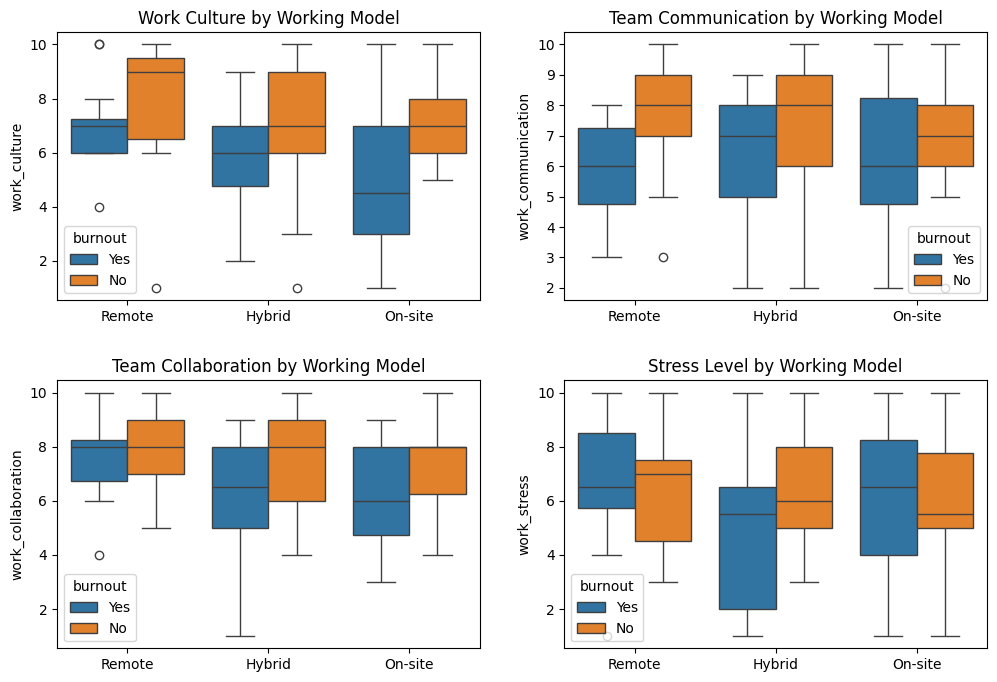

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 2, 1)
sns.boxplot(x="working_model", y="work_culture", hue='burnout', data=df)
plt.title("Work Culture by Working Model")
plt.xlabel('')

plt.subplot(2, 2, 2)
sns.boxplot(x="working_model", y="work_communication", hue='burnout', data=df)
plt.title("Team Communication by Working Model")
plt.xlabel('')

plt.subplot(2, 2, 3)
sns.boxplot(x="working_model", y="work_collaboration", hue='burnout', data=df)
plt.title("Team Collaboration by Working Model")
plt.xlabel('')

plt.subplot(2, 2, 4)
sns.boxplot(x="working_model", y="work_stress", hue='burnout', data=df)
plt.title("Stress Level by Working Model")
plt.xlabel('')

plt.show()

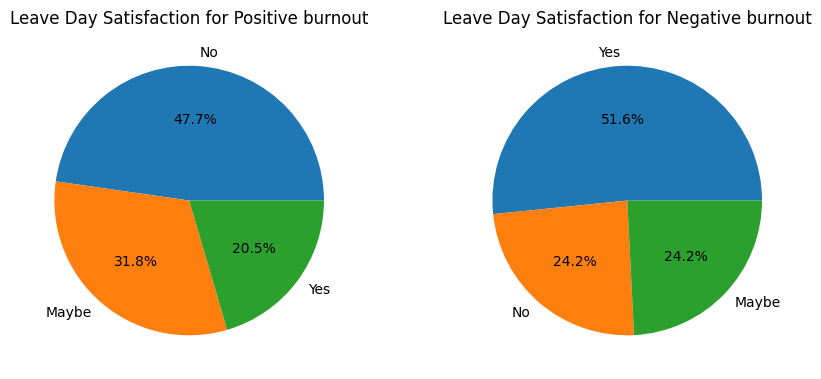

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.pie(pos_df['leave_day_satisfaction'].value_counts(), labels=pos_df['leave_day_satisfaction'].value_counts().index, autopct='%1.1f%%')
plt.title('Leave Day Satisfaction for Positive burnout')

plt.subplot(1, 2, 2)
plt.pie(neg_df['leave_day_satisfaction'].value_counts(), labels=neg_df['leave_day_satisfaction'].value_counts().index, autopct='%1.1f%%')
plt.title('Leave Day Satisfaction for Negative burnout')

plt.show()

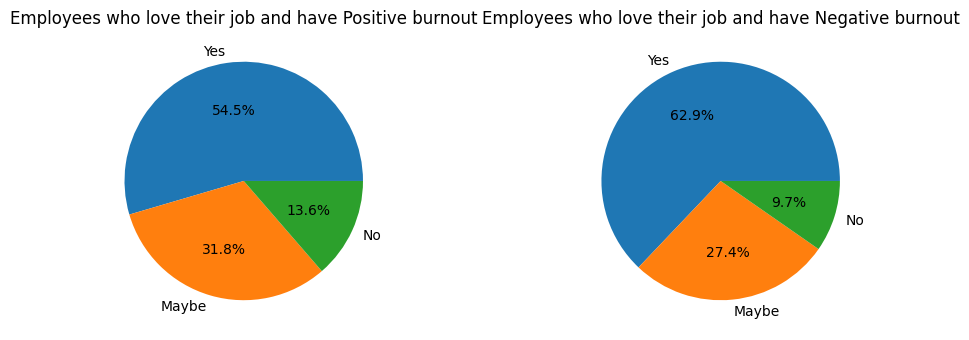

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1, 2, 1)
plt.pie(pos_df['love_job'].value_counts(), labels=pos_df['love_job'].value_counts().index, autopct='%1.1f%%')
plt.title('Employees who love their job and have Positive burnout')

plt.subplot(1, 2, 2)
plt.pie(neg_df['love_job'].value_counts(), labels=neg_df['love_job'].value_counts().index, autopct='%1.1f%%')
plt.title('Employees who love their job and have Negative burnout')

plt.show()

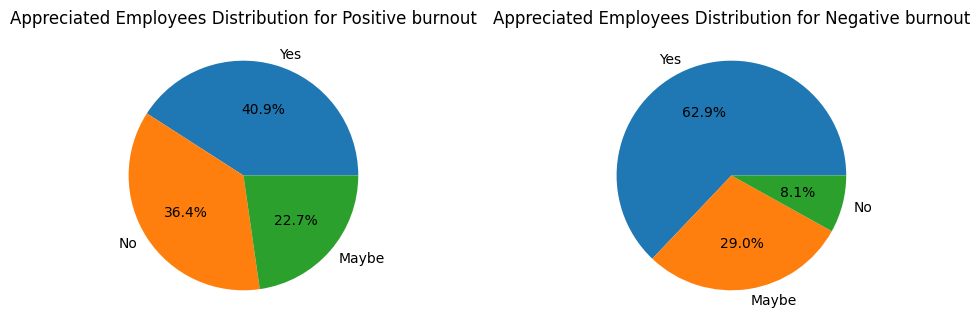

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.7)

plt.subplot(1, 2, 1)
plt.pie(pos_df['is_appreciated'].value_counts(), labels=pos_df['is_appreciated'].value_counts().index, autopct='%1.1f%%')
plt.title('Appreciated Employees Distribution for Positive burnout')

plt.subplot(1, 2, 2)
plt.pie(neg_df['is_appreciated'].value_counts(), labels=neg_df['is_appreciated'].value_counts().index, autopct='%1.1f%%')
plt.title('Appreciated Employees Distribution for Negative burnout')

plt.show()

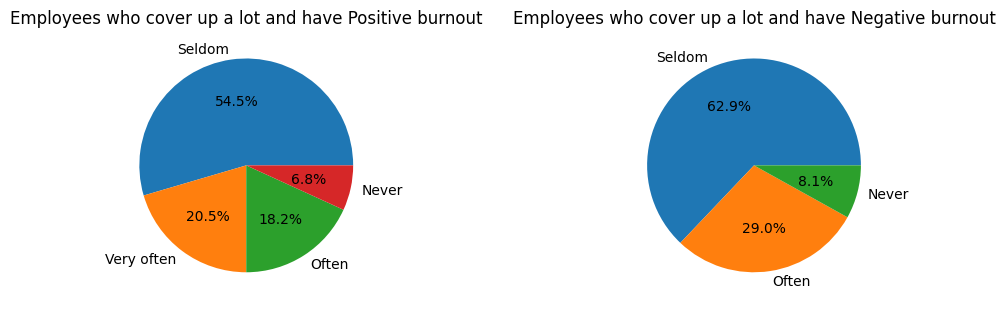

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.9)

plt.subplot(1, 2, 1)
plt.pie(pos_df['cover_up'].value_counts(), labels=pos_df['cover_up'].value_counts().index, autopct='%1.1f%%')
plt.title('Employees who cover up a lot and have Positive burnout')

plt.subplot(1, 2, 2)
plt.pie(neg_df['cover_up'].value_counts(), labels=neg_df['cover_up'].value_counts().index, autopct='%1.1f%%')
plt.title('Employees who cover up a lot and have Negative burnout')

plt.show()

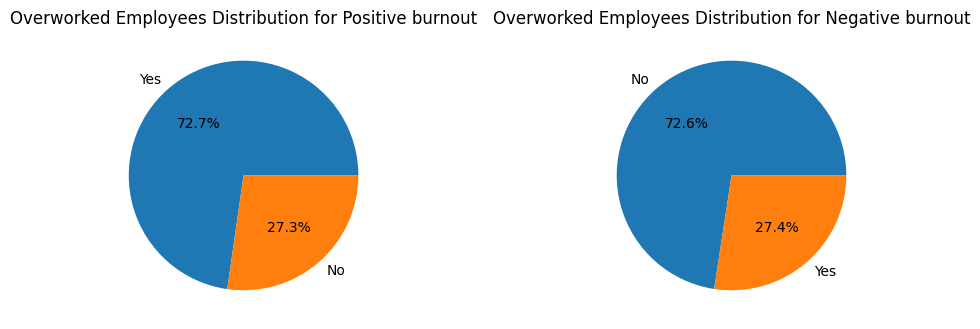

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.7)

plt.subplot(1, 2, 1)
plt.pie(pos_df['more_tasks_than_can_handle'].value_counts(), labels=pos_df['more_tasks_than_can_handle'].value_counts().index, autopct='%1.1f%%')
plt.title('Overworked Employees Distribution for Positive burnout')

plt.subplot(1, 2, 2)
plt.pie(neg_df['more_tasks_than_can_handle'].value_counts(), labels=neg_df['more_tasks_than_can_handle'].value_counts().index, autopct='%1.1f%%')
plt.title('Overworked Employees Distribution for Negative burnout')

plt.show()

## Data Preparation

In [ ]:
# Encoding

import pickle
from sklearn.preprocessing import LabelEncoder

cat = df.select_dtypes(exclude=np.number).columns.tolist()
encoders={}

for col in cat:
    l = LabelEncoder()
    df[col] = l.fit_transform(df[col])
    pickle.dump(l, open(f"{col}_enc.pkl", 'wb'))
    encoders[col] = l

In [ ]:
# Check for data imbalance

df['burnout'].value_counts()

,count
burnout,
0,62
1,44


In [ ]:
# Resample the dataset to 62 rows per burnout category

from sklearn.utils import resample

minority_class = df[df['burnout'] == 1]
majority_class = df[df['burnout'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=100, random_state=42)
majority_upsampled = resample(majority_class, replace=True, n_samples=100, random_state=42)

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_upsampled, minority_upsampled])

In [ ]:
balanced_data['burnout'].value_counts()

,count
burnout,
0,100
1,100


In [ ]:
# Splitting

from sklearn.model_selection import train_test_split

X = df.drop(['burnout'], axis=1)
y = df['burnout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler, open('scaler.pkl', 'wb'))

<Axes: >

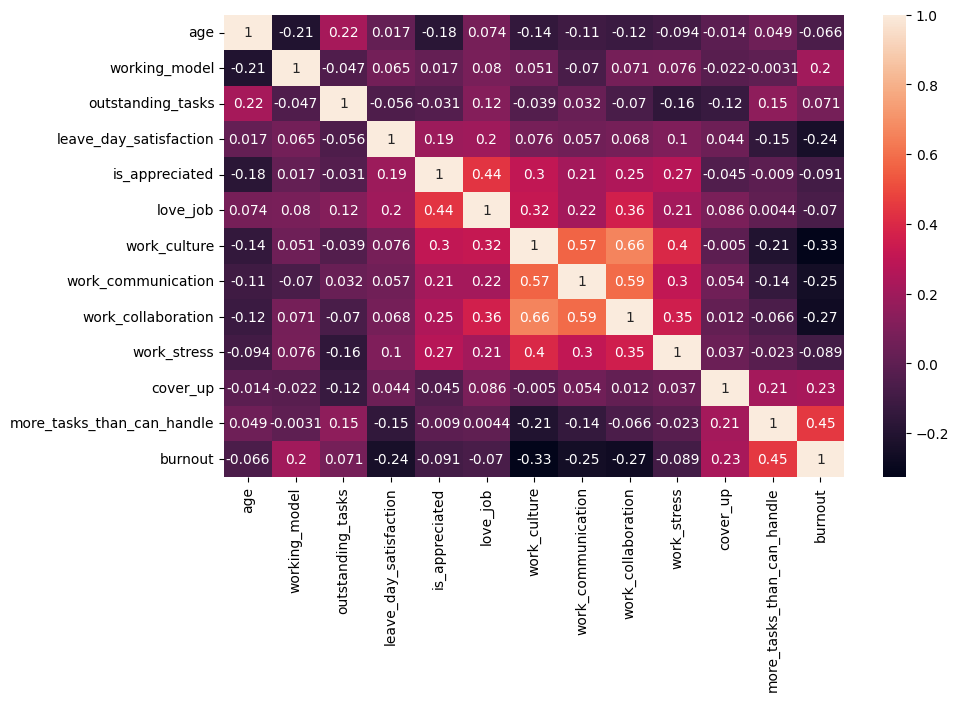

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)

## Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost
from xgboost import XGBClassifier

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Train Logistic Regression model

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))

0.6363636363636364


In [ ]:
# Train Decision Tree Classifier model

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.5909090909090909


In [ ]:
# Train Random Forest Classifier model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))
#

0.8181818181818182


In [ ]:
# Train Support Vector Classifier model

svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
print(accuracy_score(y_test, pred))

0.7727272727272727


In [ ]:
# Train KNeighbors Classifier model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.6818181818181818


In [ ]:
# Train XGBoost Classifier model

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
print(accuracy_score(y_test, pred))
#

0.7272727272727273


## Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def evaluation_plots(model):
  pred = model.predict(X_test)
  proba = model.predict_proba(X_test)[:, 1]

  print(classification_report(y_test, pred))

  # Confusion Matrix
  plt.subplot(2, 1, 1)
  conf_matrix = confusion_matrix(y_test, pred)
  plt.figure(figsize=(6, 5))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")

  plt.subplot(2, 1, 2)
  # ROC Curve and AUC
  fpr, tpr, thresholds = roc_curve(y_test, proba)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
  plt.plot([0, 1], [0, 1], color='red', linestyle="--")  # Diagonal line for random classifier
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()


              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.50      0.50      0.50         8

    accuracy                           0.64        22
   macro avg       0.61      0.61      0.61        22
weighted avg       0.64      0.64      0.64        22



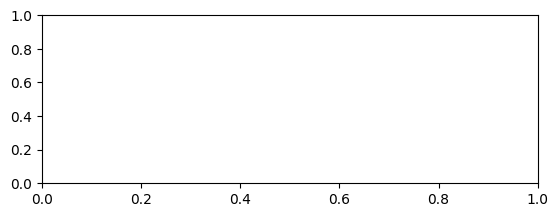

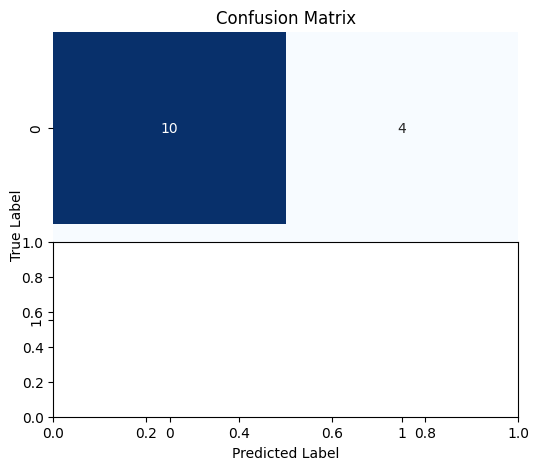

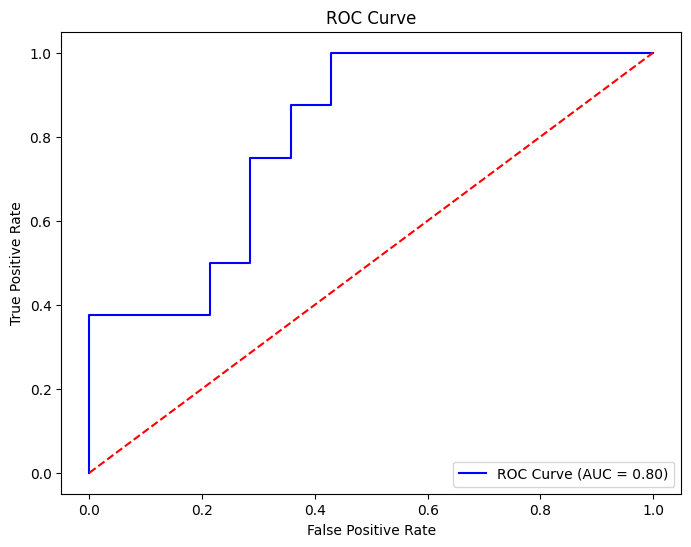

In [ ]:
evaluation_plot(lr)